In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [6]:
# Define the stock symbol for Reliance Industries
stock_symbol = 'RELIANCE.NS'  # Use .NS for NSE stocks

# Fetch historical data for the last 5 years
data = yf.download(stock_symbol, start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
# Check for missing values
data.isnull().sum()

# Use only the 'Close' price for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [8]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.1295
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0061
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0052
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0038
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0043
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0044
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0045
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0038
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0040
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0042
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0048
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0037
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0035
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0031
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - lo

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


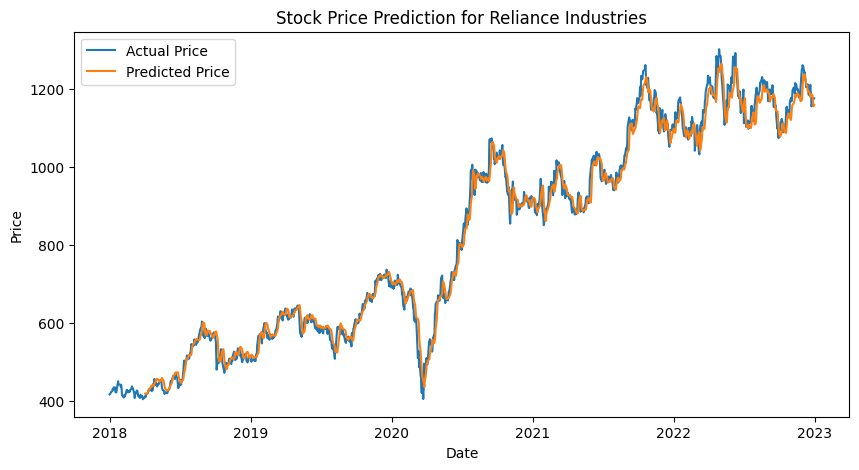

In [11]:
# Make predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Actual Price')
plt.plot(data.index[time_step + 1:len(predicted_prices) + time_step + 1], predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction for Reliance Industries')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
!pip install yfinance tensorflow scikit-learn matplotlib


In [37]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [38]:
# Fetch last 2 years of stock data for MRF
stock_symbol = "MRF.NS"
data = yf.download(stock_symbol, period="2y")
data = data[['Close']]  # Use only the 'Close' price
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,MRF.NS
Date,
2022-12-27,88090.148438
2022-12-28,87923.250000
2022-12-29,87567.953125
2022-12-30,88535.453125
2023-01-02,88051.203125


In [39]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training (80%) and test (20%)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create dataset for LSTM model
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [40]:
# Build the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1584
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0115
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0060
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0041
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0034
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0031
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0027
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0026
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0023
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0023
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0021
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0024
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0019
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0024
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0018
Epoch 16/20
11/

In [41]:
# Predict and invert scaling
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


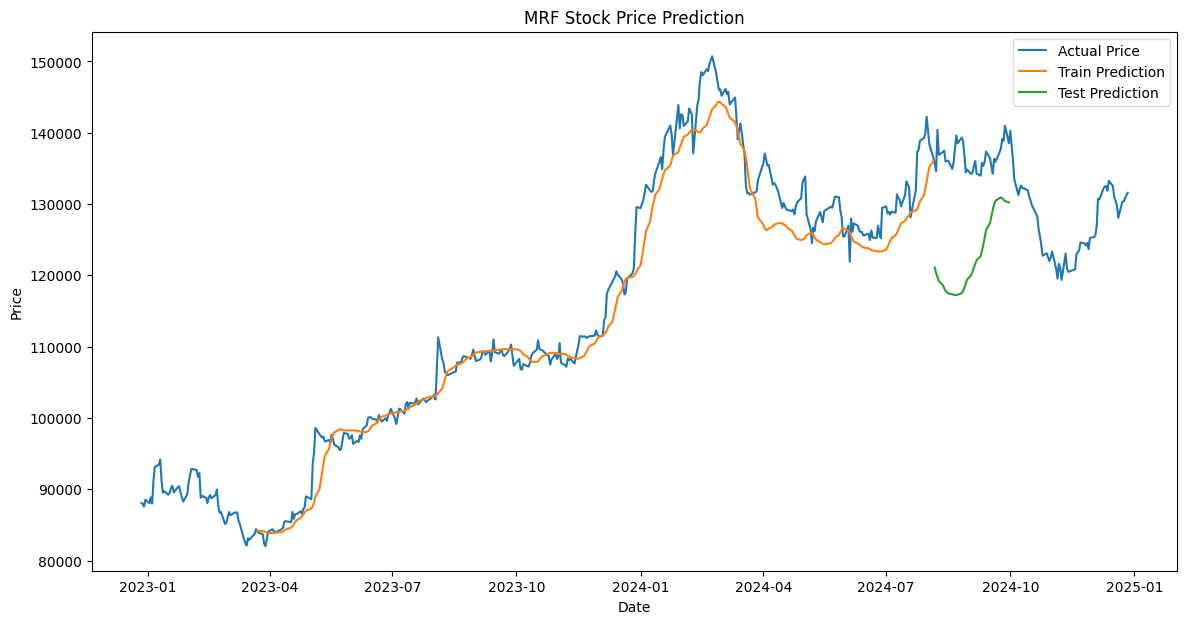

In [43]:
# Adjust the indices for plotting train and test predictions
train_len = len(y_train)

# Create a new range of indices for train predictions
train_index = data.index[time_step:time_step + train_len]

# Create a new range of indices for test predictions
test_index = data.index[time_step + train_len:time_step + train_len + len(test_predict)]

# Plot actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label="Actual Price")
plt.plot(train_index, train_predict, label="Train Prediction")
plt.plot(test_index, test_predict, label="Test Prediction")

plt.title("MRF Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

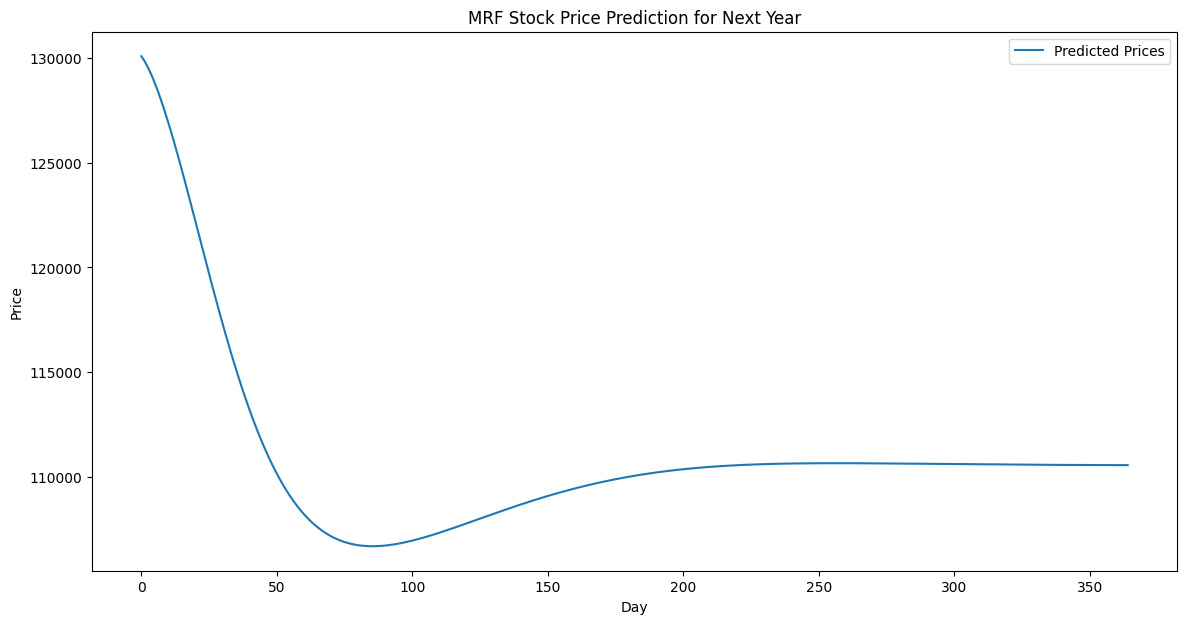

In [45]:
# Prepare the last 60 days of data for forecasting
last_60_days = scaled_data[-60:]
X_forecast = last_60_days.reshape(1, -1, 1)

# Predict next year's prices iteratively
future_prices = []
for _ in range(365):  # Predict for the next 365 days
    pred_price = model.predict(X_forecast)  # Predict next price
    future_prices.append(pred_price[0][0])  # Store predicted price
    # Append the predicted price to the sequence, maintaining the shape
    pred_price_reshaped = pred_price.reshape(1, 1, 1)
    X_forecast = np.append(X_forecast[:, 1:, :], pred_price_reshaped, axis=1)

# Inverse scale the predictions
future_prices = scaler.inverse_transform(np.array(future_prices).reshape(-1, 1))

# Plot the predicted prices
plt.figure(figsize=(14, 7))
plt.plot(range(365), future_prices, label="Predicted Prices")
plt.title("MRF Stock Price Prediction for Next Year")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()



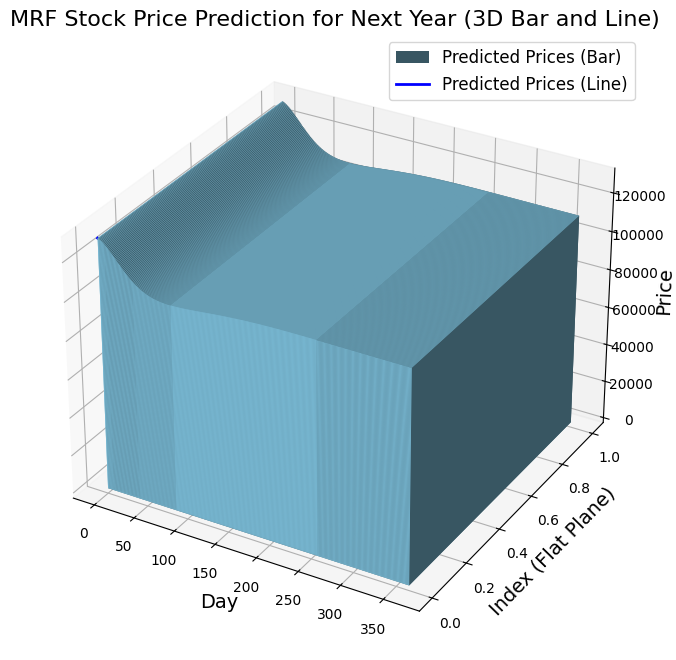

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# X and Y coordinates for the bar graph
x = range(365)
y = np.zeros(365)  # All bars lie on the same y-axis (flat plane)
z = np.zeros(365)  # Start height of bars

# Bar graph in 3D
dx = np.ones(365)  # Width of bars along x-axis
dy = np.ones(365)  # Width of bars along y-axis
dz = future_prices.flatten()  # Height of each bar (price)

# Plot the 3D bars
ax.bar3d(x, y, z, dx, dy, dz, color='skyblue', label="Predicted Prices (Bar)")

# Line overlay in 3D
ax.plot(x, y, dz, color='blue', linewidth=2, label="Predicted Prices (Line)")

# Adding labels and title
ax.set_title("MRF Stock Price Prediction for Next Year (3D Bar and Line)", fontsize=16)
ax.set_xlabel("Day", fontsize=14)
ax.set_ylabel("Index (Flat Plane)", fontsize=14)
ax.set_zlabel("Price", fontsize=14)
ax.legend(fontsize=12)

# Show the 3D graph
plt.show()
